1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)


In [1260]:
pip install mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1261]:
pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1262]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier

In [1263]:
heart = pd.read_csv('heart.csv') 
heart.info()
heart.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1264]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1265]:
heart.drop_duplicates(inplace=True)
heart.duplicated().sum()

np.int64(0)

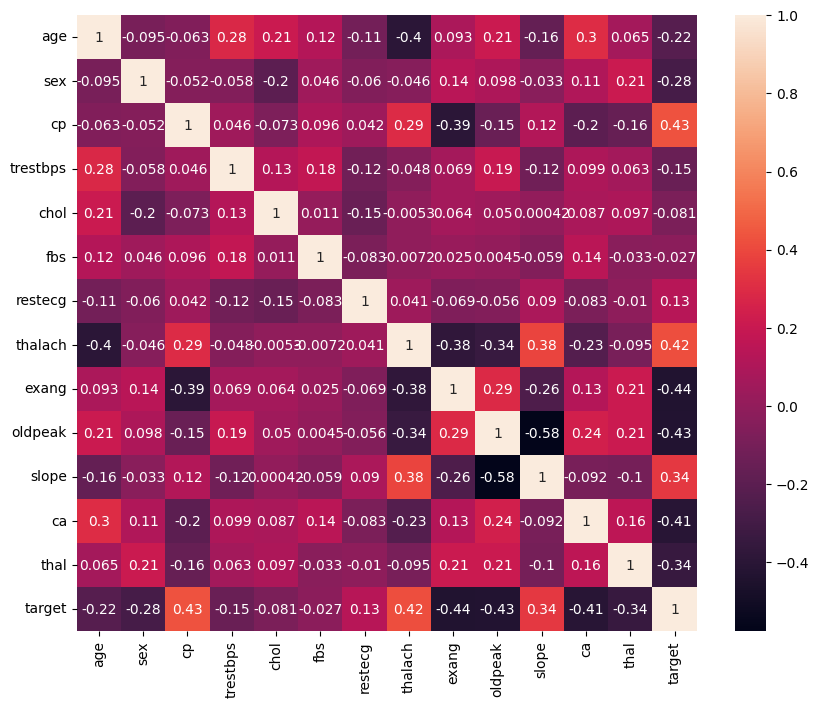

In [1266]:
plt.figure(figsize=(10,8))
corr_matrix = heart.corr()
sns.heatmap(corr_matrix,annot_kws={"size": 10},annot=True)
plt.show()

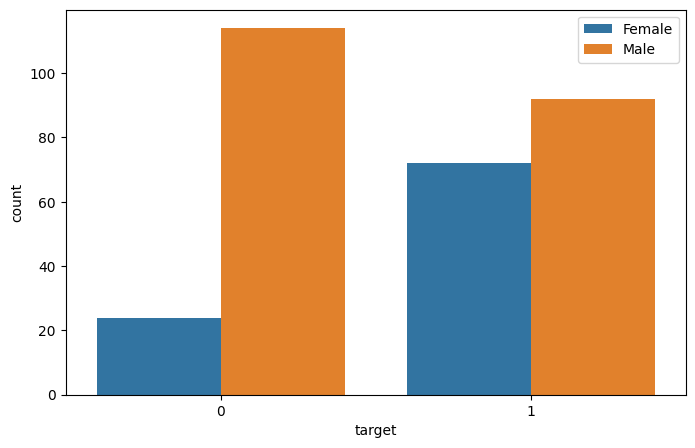

In [1267]:
plt.figure(figsize=(8,5))
sns.countplot(x=heart.target,hue=heart.sex)
plt.legend(labels=['Female', 'Male'])

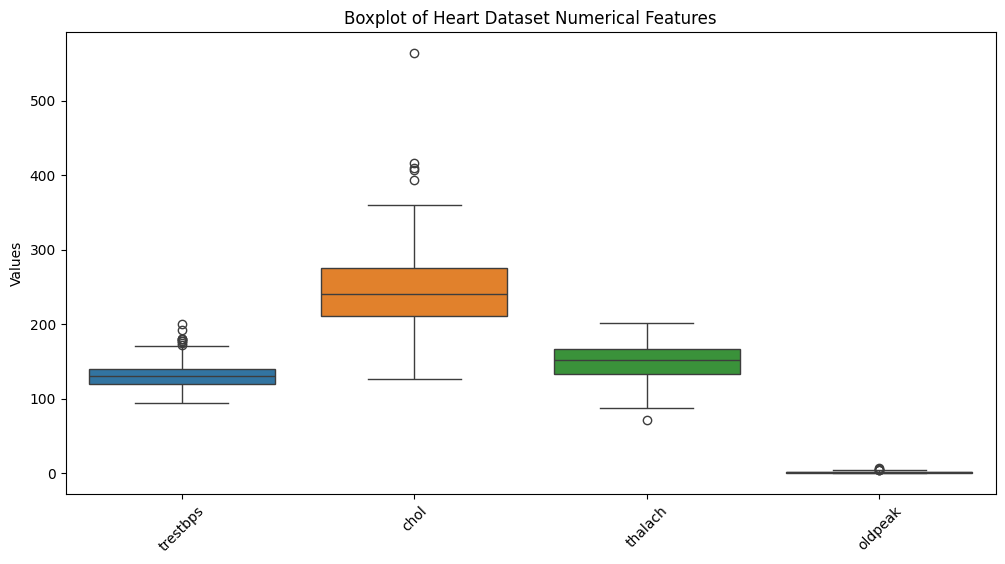

In [1268]:
plt.figure(figsize=(12, 6))

# Create box plots for the specified numerical columns
sns.boxplot(data=heart[['trestbps', 'chol', 'thalach', 'oldpeak']])

# Add title and labels
plt.title('Boxplot of Heart Dataset Numerical Features')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [1269]:
y = heart["target"]
X = heart.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0, shuffle= True)

In [1270]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1271]:
class ModelEvaluator:
    def evaluate(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        return {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "confusion_matrix": conf_matrix
        }

## Model 1: Logistic Regression

In [1272]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)

In [1273]:
evaluator = ModelEvaluator()

results_lr = evaluator.evaluate(y_test, lr_predict)

print("Logistic Regression Results:")
print("Confusion Matrix:\n", results_lr["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_lr["accuracy"] * 100))
print("Precision: {:.2f}".format(results_lr["precision"]))
print("Recall: {:.2f}".format(results_lr["recall"]))
print("F1 Score: {:.2f}".format(results_lr["f1_score"]))

Logistic Regression Results:
Confusion Matrix:
 [[22  5]
 [ 3 31]]

Accuracy: 86.89%
Precision: 0.86
Recall: 0.91
F1 Score: 0.89


## Model 2: Naive Bayes

In [1274]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nbpred)

In [1275]:
results_nb = evaluator.evaluate(y_test, nbpred)

print("Naive Bayes Results:")
print("Confusion Matrix:\n", results_nb["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_nb["accuracy"] * 100))
print("Precision: {:.2f}".format(results_nb["precision"]))
print("Recall: {:.2f}".format(results_nb["recall"]))
print("F1 Score: {:.2f}".format(results_nb["f1_score"]))

Naive Bayes Results:
Confusion Matrix:
 [[24  3]
 [ 3 31]]

Accuracy: 90.16%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


## Model 3: Random Forest Classifier

In [1276]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=16, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

In [1277]:
results_rf = evaluator.evaluate(y_test, rf_predicted)

# Print results for Random Forest Classifier
print("Random Forest Classifier Results:")
print("Confusion Matrix:\n", results_rf["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_rf["accuracy"] * 100))
print("Precision: {:.2f}".format(results_rf["precision"]))
print("Recall: {:.2f}".format(results_rf["recall"]))
print("F1 Score: {:.2f}".format(results_rf["f1_score"]))

Random Forest Classifier Results:
Confusion Matrix:
 [[23  4]
 [ 2 32]]

Accuracy: 90.16%
Precision: 0.89
Recall: 0.94
F1 Score: 0.91


By altering n_estimators to 16 from 20 saw an increase in performance by correctly predicting two of the once positive instances incorrectly predicted as negative. The improvemnt of recall from .88 to .94.

## Model 4: K-Nearest Neighbor

In [1278]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [1279]:
results_knn = evaluator.evaluate(y_test, knn_predicted)

print("K-Neighbors Classifier Results:")
print("Confusion Matrix:\n", results_knn["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_knn["accuracy"] * 100))
print("Precision: {:.2f}".format(results_knn["precision"]))
print("Recall: {:.2f}".format(results_knn["recall"]))
print("F1 Score: {:.2f}".format(results_knn["f1_score"]))

K-Neighbors Classifier Results:
Confusion Matrix:
 [[25  2]
 [ 3 31]]

Accuracy: 91.80%
Precision: 0.94
Recall: 0.91
F1 Score: 0.93


Saw large accuracy improvements with n_neighbor adjustments, 7 and 8 yeild same result with the highest accuracy. 

## Model 5: Decision Tree

In [1280]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)

In [1281]:
results_dt = evaluator.evaluate(y_test, dt_predicted)

print("Decision Tree Classifier Results:")
print("Confusion Matrix:\n", results_dt["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_dt["accuracy"] * 100))
print("Precision: {:.2f}".format(results_dt["precision"]))
print("Recall: {:.2f}".format(results_dt["recall"]))
print("F1 Score: {:.2f}".format(results_dt["f1_score"]))

Decision Tree Classifier Results:
Confusion Matrix:
 [[21  6]
 [ 4 30]]

Accuracy: 83.61%
Precision: 0.83
Recall: 0.88
F1 Score: 0.86


Max depth of 4 is the most accurate, experimenting with others not as succesful this yeilds the best results. 

## Model 6: Extreme Gradient Boosting (XGBoost)

In [1282]:
m6 = 'Extreme Gradient Boosting Classifier'
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)        
xgb_predicted = xgb.predict(X_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

In [1283]:
results_xgb = evaluator.evaluate(y_test, xgb_predicted)

print("Extreme Gradient Boosting Classifier Results:")
print("Confusion Matrix:\n", results_xgb["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_xgb["accuracy"] * 100))
print("Precision: {:.2f}".format(results_xgb["precision"]))
print("Recall: {:.2f}".format(results_xgb["recall"]))
print("F1 Score: {:.2f}".format(results_xgb["f1_score"]))

Extreme Gradient Boosting Classifier Results:
Confusion Matrix:
 [[21  6]
 [ 6 28]]

Accuracy: 80.33%
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


## Model 7: Support Vector Classifier

In [1284]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, svc_predicted)

In [1285]:
results_svc = evaluator.evaluate(y_test, svc_predicted)

print("Support Vector Classifier Results:")
print("Confusion Matrix:\n", results_svc["confusion_matrix"])
print("\nAccuracy: {:.2f}%".format(results_svc["accuracy"] * 100))
print("Precision: {:.2f}".format(results_svc["precision"]))
print("Recall: {:.2f}".format(results_svc["recall"]))
print("F1 Score: {:.2f}".format(results_svc["f1_score"]))

Support Vector Classifier Results:
Confusion Matrix:
 [[26  1]
 [ 3 31]]

Accuracy: 93.44%
Precision: 0.97
Recall: 0.91
F1 Score: 0.94


In [1286]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest', 'K-Nearest Neighbor','Decision Tree', 'XGBoost', 'Support Vector Classifier'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100, xgb_acc_score*100, svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.885246
1,Naive Bayes,90.163934
2,Random Forest,90.163934
3,K-Nearest Neighbor,91.803279
4,Decision Tree,83.606557
5,XGBoost,80.327869
6,Support Vector Classifier,93.442623
